In [154]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [155]:
def manual_erosion(imagem, elemento_estruturante):
    # Dimensões do elemento estruturante
    h, w = elemento_estruturante.shape
    # Dimensões da imagem
    img_h, img_w = imagem.shape
    
    # Calcular a margem para aplicar a erosão
    pad_h = h // 2
    pad_w = w // 2

    # Criar uma nova imagem para armazenar o resultado
    imagem_erodida = np.zeros(imagem.shape)

    # Percorrer cada pixel da imagem (evitando as bordas)
    for i in range(pad_h, img_h - pad_h):
        for j in range(pad_w, img_w - pad_w):
            # Extrair a região correspondente na imagem            
            region = imagem[i - pad_h:i + pad_h + 1,j - pad_w:j + pad_w + 1] 

            if (np.all(region[elemento_estruturante == 1] == 1) and (np.all(region[elemento_estruturante == 0] == 0))):
                imagem_erodida[i, j] = 1

    return imagem_erodida

def uniao(img1, img2):
    """Retorna a união de duas imagens binarizadas."""
    rows, cols = len(img1), len(img1[0])
    resultado = [[0] * cols for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            resultado[i][j] = 1 if img1[i][j] == 1 or img2[i][j] == 1 else 0
    return resultado

def manual_Acerto_e_Erro(imagem, elementos_estruturante):
    
    Acerto_e_Erro = np.zeros(imagem.shape)

    for elemento in elementos_estruturantes:
        Acerto_e_Erro = uniao(Acerto_e_Erro, manual_erosion(imagem, elemento))
        # Acerto_e_Erro += manual_erosion(imagem, elemento)
    
    return Acerto_e_Erro



# Função para exibir a imagem com uma grade sobre os pixels
def mostrar_imagem_com_grid(imagem, eixo, titulo):
    eixo.imshow(imagem, cmap='gray', interpolation='nearest')
    eixo.set_title(titulo)
    eixo.grid(which='both', color='gray', linestyle='-', linewidth=0.5)
    eixo.set_xticks(np.arange(-0.5, imagem.shape[1], 1))
    eixo.set_yticks(np.arange(-0.5, imagem.shape[0], 1))
    eixo.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)



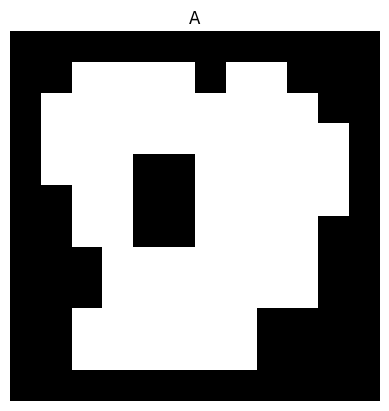

In [156]:
# Imagem binária (A)
image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype=np.uint8)

# Exibir o resultado final
plt.imshow(image, cmap='gray')
plt.title('A')
plt.axis('off')
plt.show()

[[0.5 1.  0.5]
 [0.  1.  1. ]
 [0.  0.  0.5]]


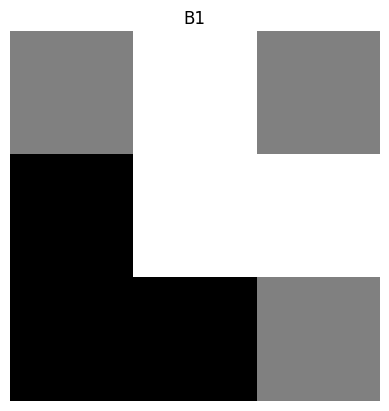

In [157]:
B1 = np.array([
    [0.5, 1, 0.5],
    [0, 1, 1],
    [0, 0, 0.5]
])

print(B1)

# Exibir o resultado final
plt.imshow(B1, cmap='gray')
plt.title('B1')
plt.axis('off')
plt.show()

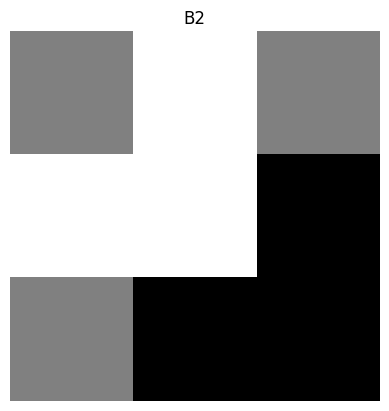

In [158]:
B2 = np.array([
    [0.5, 1, 0.5],
    [1, 1, 0],
    [0.5, 0, 0]
])

# Exibir o resultado final
plt.imshow(B2, cmap='gray')
plt.title('B2')
plt.axis('off')
plt.show()

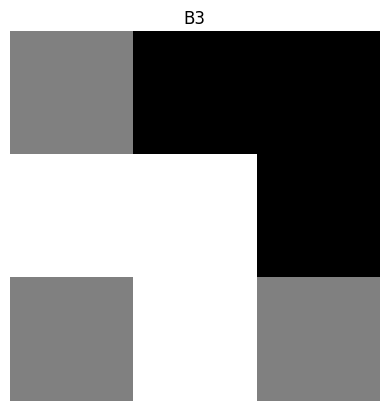

In [159]:
B3 = np.array([
    [0.5, 0, 0],
    [1, 1, 0],
    [0.5, 1, 0.5]
])

# Exibir o resultado final
plt.imshow(B3, cmap='gray')
plt.title('B3')
plt.axis('off')
plt.show()

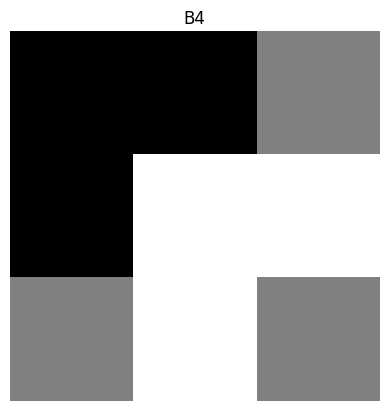

In [160]:
B4 = np.array([
    [0, 0, 0.5],
    [0, 1, 1],
    [0.5, 1, 0.5]
])

# Exibir o resultado final
plt.imshow(B4, cmap='gray')
plt.title('B4')
plt.axis('off')
plt.show()

In [161]:
# Visualizar as imagens com delimitação dos pixels
eroded_image_B1 = manual_erosion(image, B1)
# gradiente_interno = image - eroded_image

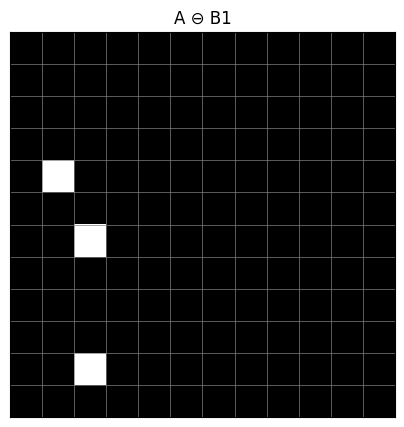

In [162]:
# fig, ax = plt.subplots(1, 2, figsize=(16, 3))
fig, ax = plt.subplots(1, 1, figsize=(16, 5))



# Exibir cada imagem com a função de grid
# mostrar_imagem_com_grid(image, ax[0], "Imagem Original")
mostrar_imagem_com_grid(eroded_image_B1, ax, "A ⊖ B1")
# mostrar_imagem_com_grid(gradiente_interno, ax[2], "Gradiente Interno")

plt.show()

In [163]:
# Visualizar as imagens com delimitação dos pixels
eroded_image_B2 = manual_erosion(image, B2)
# gradiente_interno = image - eroded_image

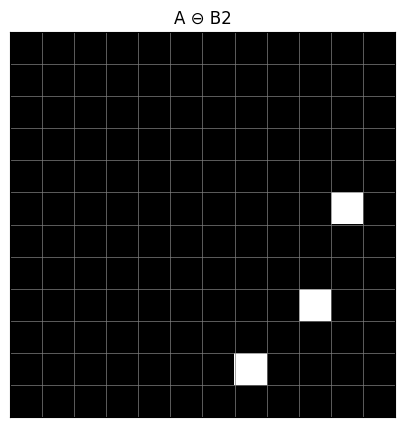

In [164]:
# fig, ax = plt.subplots(1, 2, figsize=(16, 3))
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


# Exibir cada imagem com a função de grid
# mostrar_imagem_com_grid(image, ax[0], "Imagem Original")
mostrar_imagem_com_grid(eroded_image_B2, ax, "A ⊖ B2")
# mostrar_imagem_com_grid(gradiente_interno, ax[2], "Gradiente Interno")

plt.show()

In [165]:
# Visualizar as imagens com delimitação dos pixels
eroded_image_B3 = manual_erosion(image, B3)
# gradiente_interno = image - eroded_image

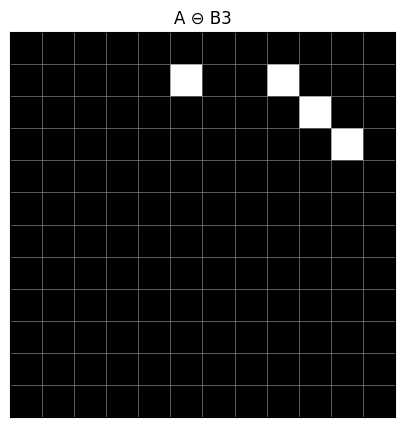

In [166]:
# fig, ax = plt.subplots(1, 2, figsize=(16, 3))
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


# Exibir cada imagem com a função de grid
# mostrar_imagem_com_grid(image, ax[0], "Imagem Original")
mostrar_imagem_com_grid(eroded_image_B3, ax, "A ⊖ B3")
# mostrar_imagem_com_grid(gradiente_interno, ax[2], "Gradiente Interno")

plt.show()

In [167]:
# Visualizar as imagens com delimitação dos pixels
eroded_image_B4 = manual_erosion(image, B4)
# gradiente_interno = image - eroded_image

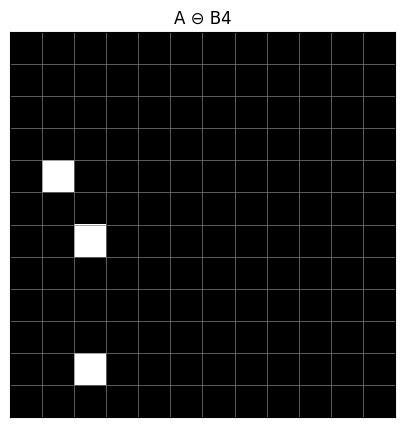

In [168]:
# fig, ax = plt.subplots(1, 2, figsize=(8, 3))
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


# Exibir cada imagem com a função de grid
# mostrar_imagem_com_grid(image, ax[0], "Imagem Original")
mostrar_imagem_com_grid(eroded_image_B1, ax, "A ⊖ B4")
# mostrar_imagem_com_grid(gradiente_interno, ax[2], "Gradiente Interno")

plt.show()

In [169]:
image_final = eroded_image_B1 + eroded_image_B2 + eroded_image_B3 + eroded_image_B4

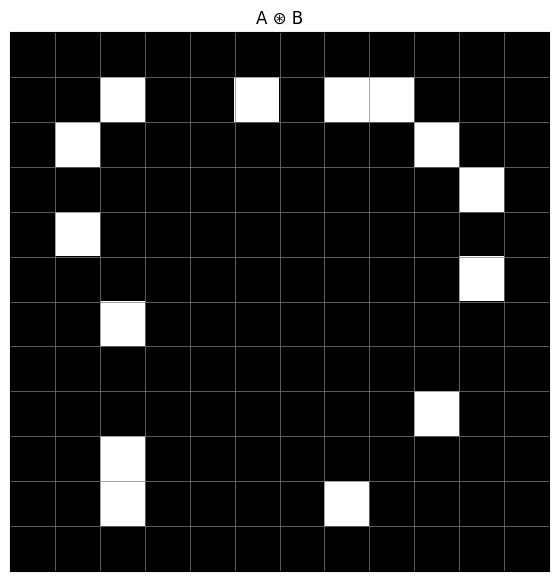

In [173]:
# fig, ax = plt.subplots(1, 2, figsize=(16, 3))
fig, ax = plt.subplots(1, 1, figsize=(16, 7))


# Exibir cada imagem com a função de grid
# mostrar_imagem_com_grid(image, ax[0], "Imagem Original")
mostrar_imagem_com_grid(image_final, ax, "A ⊛ B")
# mostrar_imagem_com_grid(gradiente_interno, ax[2], "Gradiente Interno")

plt.show()

In [171]:
elementos_estruturantes = [B1, B2, B3, B4]

imagem_acerto_e_erro = np.array(manual_Acerto_e_Erro(image, elementos_estruturantes))

print(imagem_acerto_e_erro)

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 1 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


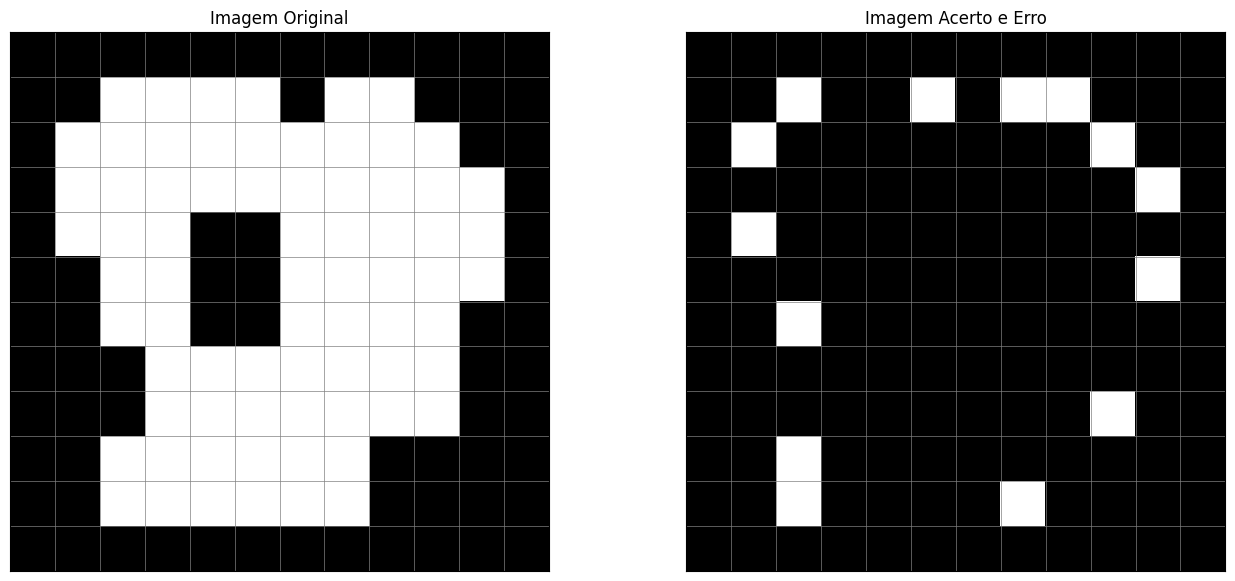

In [172]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))


# Exibir cada imagem com a função de grid
mostrar_imagem_com_grid(image, ax[0], "Imagem Original")
mostrar_imagem_com_grid(imagem_acerto_e_erro, ax[1], "Imagem Acerto e Erro")
# mostrar_imagem_com_grid(gradiente_interno, ax[2], "Gradiente Interno")

plt.show()